## Regression
### 4. Implement locally weighted linear regression as described in Stanford lecture notes.

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Getting the dataset uploaded on GitHub
url = 'https://raw.githubusercontent.com/Harshvg101/Harshvg101/main/ex1data2.txt' 
df = pd.read_csv(url, sep=',', header=None)
df = df-df.mean() 
df = df/df.std()

df.insert(0, 'bias', 1)
df.columns = ['bias', 'Area', 'Bedrooms', 'Standardized Price']
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


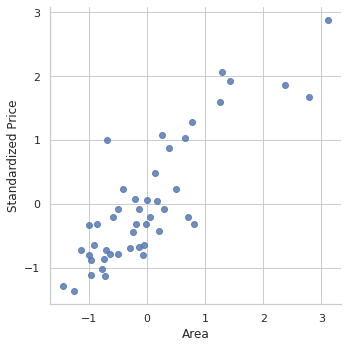

In [ ]:
# Plotting standardized Price v/s Area : (Read data)
sns.set(style='whitegrid', context='notebook')
sns.lmplot(x='Area', y='Standardized Price', data=df, fit_reg=False)

In [ ]:
from numpy.lib.function_base import gradient

# Making the Locally Weighted Linear Regression Class
class Locally_Weighted_LinearReg :
  def __init__ (self, X_train, Y_train, x=None, theta_seed=None):
    # defining class constructor and intializing some frequently used variables
    self.X_train = X_train 
    self.Y_train = Y_train
    self.m = X_train.shape[0]
    self.x = x
    if(theta_seed is not None) :
      self.theta = theta_seed
    else :
      self.theta = np.random.randn(3)


  def weights(self, x, tau=1) :
    #function to return calculate weight matrix with respect to x and tau
    self.x = x
    w_ = np.mat(np.eye(self.X_train.shape[0]))
    t2 = -2*tau**2

    
    for i in range(self.X_train.shape[0]) :
      w_[i, i] = np.exp(np.dot((self.X_train[i]-self.x), (self.X_train[i]-self.x).T)/t2)
    
    return w_


  def h(self, x, tau=1):
    # function to predict y with respect to x
    self.x = x
   
    w_ = self.weights(self.x) 
    y = self.Y_train.reshape(self.m, 1)
    
    theta = np.linalg.pinv(self.X_train.T*(w_*self.X_train))*(self.X_train.T*(w_*y))
    self.theta = theta
    y_pred = np.dot(x,theta)

    return theta, y_pred[0, 0]


  def predicts(self, ) :
    # function to return list of predictions over all X
    predictions = []

    for x_ in self.X_train :
      theta, y_pred = self.h(x_)
      predictions.append(y_pred)

    return predictions 



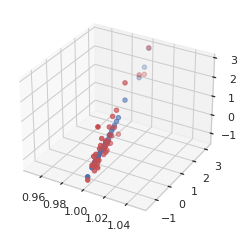

In [ ]:

# making object of Locally Weighted Linear Regression class
lwlr = Locally_Weighted_LinearReg(X_train, Y_train)

predictions_ = lwlr.predicts()
fig = plt.figure()
plot = fig.add_subplot(111, projection='3d')
plot.scatter(X_train[:, 0], X_train[:, 1], Y_train, c='r', marker='o')
plot.scatter(X_train[:, 0], X_train[:, 1], predictions_, c='b', marker='o')
plt.show()
